# Utilizing a Keras LSTM model to forecast stock trends

As financial institutions begin to embrace artificial intelligence, machine learning is increasingly utilized to help make trading decisions. Although there is an abundance of stock data for machine learning models to train on, a high noise to signal ratio and the multitude of factors that affect stock prices are among the several reasons that predicting the market difficult. At the same time, these models don’t need to reach high levels of accuracy because even 60% accuracy can deliver solid returns. One method for predicting stock prices is using a long short-term memory neural network (LSTM) for times series forecasting.

## LSTM: A Brief Explanation
LSTMs are an improved version of recurrent neural networks (RNNs). RNNs are analogous to human learning. When humans think, we don’t start our thinking from scratch each second. For example, in the sentence “Bob plays basketball”, we know that Bob is the person who plays basketball because we retain information about past words while reading sentences. Similarly, RNNs are networks with loops in them, which allow them to use past information before arriving at a final output. However, RNNs can only connect recent previous information and cannot connect information as the time gap grows. This is where LSTMs come into play; LSTMs are a type of RNN that remember information over long periods of time, making them better suited for predicting stock prices.

## Imports/Initial Data
To begin our project, we import numpy for making scientific computations, pandas for loading and modifying datasets, and matplotlib for plotting graphs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

After making the necessary imports, we load data on Tata Global Beverage’s past stock prices. From the data, we select the values of the first and second columns (“Open” and “High” respectively) as our training dataset. The “Open” column represents the opening price for shares that day and the “High” column represents the highest price shares reached that day.

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

To get a look at the dataset we’re using, we can check the head, which shows us the first five rows of our dataset.

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


“Low” represents the lowest share price for the day, “Last” represents the price at which the last transaction for a share went through. “Close” represents the price shares ended at for the day.

## Data Normalization
Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Display the modified dataset
print(dataset_train.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


## Incorporating Timesteps Into Data
We should input our data in the form of a 3D array to the LSTM model. First, we create data in 60 timesteps before using numpy to convert it into an array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Creating the LSTM Model
Before we can develop the LSTM, we have to make a few imports from Keras: Sequential for initializing the neural network, LSTM to add the LSTM layer, Dropout for preventing overfitting with dropout layers, and Dense to add a densely connected neural network layer.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

The LSTM layer is added with the following arguments: 50 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.

Specifying 0.2 in the Dropout layer means that 20% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit. To compile our model we use the Adam optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 100 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 30s 172ms/step - loss: 0.0098
Epoch 2/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0037
Epoch 3/100
62/62 [==============================] - 10s 154ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 9s 144ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 10s 156ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 8s 135ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 12s 188ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 10s 154ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 8s 134ms/step - loss: 0.0018
Epoch

## Making Predictions on the Test Set
We start off by importing the test set

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices, we have to modify the test set (notice similarities to the edits we made to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [ ]:
import numpy as np
import pandas as pd
# Assuming you have already defined and trained the LSTM model

# Concatenate the 'Open' values from both train and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Prepare the inputs for prediction
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

# Fit the scaler on the training data and apply the transformation to the inputs
sc.fit(dataset_train['Open'].values.reshape(-1, 1))
inputs = sc.transform(inputs)

# Prepare the test data for prediction
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform the predicted stock prices
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


## Plotting the Results
After all these steps, we can use matplotlib to visualize the result of our predicted stock price and the actual stock price.

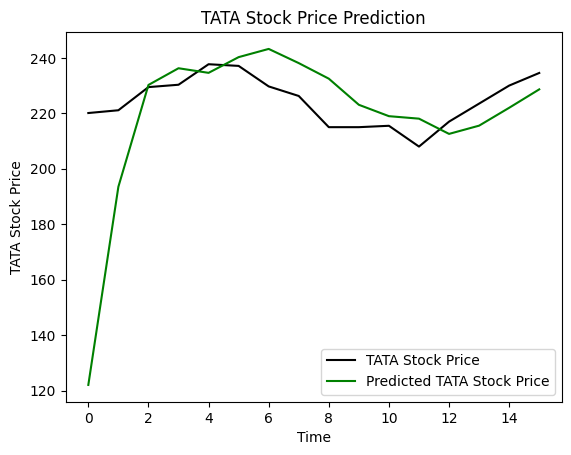

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()